### 의사결정나무(DT)
- IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘.

- 피처(특성) 중에서 선택한 기준으로데이터 분할

    * 엔트로피 (불순도) ==> 낮아지는 방향으로 진행.
        - 예) 배 상자 속에 사과가 섞인 정도 

    * 정보이득 : 1-엔트로피 => 높아지는 방향

    * 지니계수 : 불평등수치값 => 낮아지는 방향
- 단점 : 과대적합이 될 가능성이 높음! 성능이 좋지 않음.
- 장점 : 전처리의 영향을 받지 않음. / 직관성이 높음. / 피처들 중 주요 피처 확인이 가능.
- 주의 : 
    * 여기서 주요피처는 데이터 분할을 위한 주요 피처
    * 100% 데이터의 주요 피처가 아닐 수도 있음.=> 다른 검사 (상관계수, 시각화 등등)와 함께 평가.
    


[1] 모듈 로딩 및 데이터 준비.

In [91]:
# 모듈 로딩
import pandas as pd 
import numpy as np

df = pd.read_csv('../data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


[2] 학습용 데이터 셋 준비<hr>

[2-1] 피처와 타겟 분리

In [93]:
featureDF= df[df.columns[:-1]]
targetSR = df[df.columns[-1]]

[2-2] 훈련용과 테스트용 데이터셋 분리

In [94]:
from sklearn.model_selection import train_test_split
Xtrn, Xtst, ytrn, ytst = train_test_split(featureDF, targetSR,
                                          test_size=0.2,
                                          stratify=targetSR)

[3] 기계학습 진행 <hr>
- target 데이터 확인 결과 : 3개의 분류.
- 학습 유형 : 지도 학습 + 분류(classification)
    * 분류 알고리즘 => knn, logisticRegression, SVM-SVC, Decision TreeClassifier

[3-1] decision Tree 알고리즘으로 분류

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
# 인스턴스 생성
mdl = DecisionTreeClassifier(criterion='entropy')
mdl.fit(Xtrn, ytrn)

DecisionTreeClassifier(criterion='entropy')

In [97]:
mdl.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

None
None


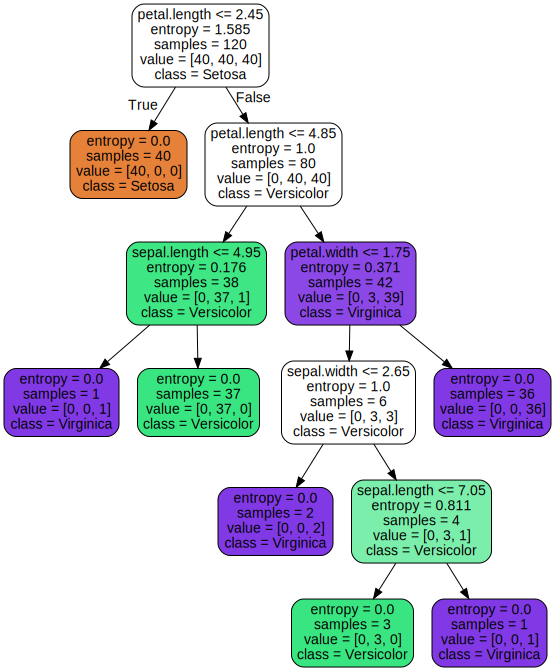

In [98]:
# 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz # 의사결정 나무 넣는 모듈

print(export_graphviz(mdl, 'iris.text')) #out_file=> 파일로 저장 가능.
print(export_graphviz(mdl, 'iris.png')) #out_file=> 파일로 저장 가능.


# dot 언어로 작성된 내용을 시각화 해주는 모듈
import graphviz as gz 


# DT모델의 시각화 정보를 dot 언어로 작성해서 파일로 저장.
export_graphviz(mdl, out_file='iris_tree.dot', feature_names=mdl.feature_names_in_, class_names=mdl.classes_, filled=True, rounded=True) # filled = True 하면 색 / rounded 하면 사각형 모서리가 둥글어짐.

gz.Source.from_file('iris_tree.dot') # 필드
#gz.Source.from_file('iris.png')

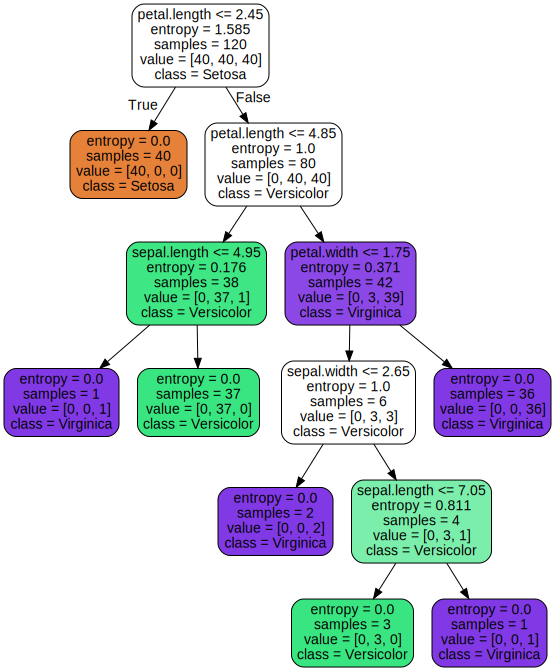

In [99]:
gz.Source.from_file('iris_tree.dot')

- conda env list ===> 가상환경 리스트
- conda activate EXAM_ML(가상환경 이름)
- pip install GraphViz ===> GraphViz 설치
- python ===> 파이썬 명령어 사용 가능

[4] 모델 평가<hr>

In [100]:
train = mdl.score(Xtrn, ytrn)
test = mdl.score(Xtst, ytst)
print(f'[train]:{train}, [test] : {test}')

[train]:1.0, [test] : 0.8333333333333334


[5] 문제 해결 및 성능 향상 즉, 튜능 <hr>
- 원인 예상 
    * 데이터셋 부족 => cv
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절

- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [101]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [102]:
# 모델 적합 조건
# cv => 기본 5, ... 
# DT의 하이퍼파라미터 => max_depth
dtMdl = DecisionTreeClassifier()
n_cv = 5
params = {'criterion':['gini', 'entropy', 'log_loss'], 
         'max_depth':[5, 10, 15],
         'min_samples_split':[2, 4, 6]}

# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습 진행해 주는 인스턴스.
gs = GridSearchCV(dtMdl, param_grid=params, cv=n_cv) 

In [103]:
# 조합된 모델들의 학습 진행
result= gs.fit(Xtrn, ytrn)

# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [104]:
# 학습 후 저장된 모델 파라미터 확인 
# 교차학습 결과 => 조합된 모델의 개수 만큼 출력.
cv_resultsDF = pd.DataFrame(gs.cv_results_)
cv_resultsDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002007,0.000629,0.001415,0.000480,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
1,0.001525,0.000439,0.000816,0.000410,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
2,0.001621,0.000490,0.001321,0.000754,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
3,0.001906,0.000188,0.001002,0.000003,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.916667,0.875000,0.958333,1.0,0.958333,0.941667,0.042492,9
4,0.001600,0.000490,0.001412,0.000508,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
5,0.001972,0.000472,0.001440,0.000353,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
6,0.001451,0.000464,0.000604,0.000493,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,8
7,0.001200,0.000400,0.001049,0.000094,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
8,0.001404,0.000490,0.000795,0.000398,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.916667,0.958333,1.0,0.958333,0.958333,0.026352,1
9,0.001204,0.000394,0.000796,0.000398,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.916667,0.875000,0.958333,1.0,0.958333,0.941667,0.042492,9


In [105]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [106]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
my_best_mdl = gs.best_estimator_ # 이렇게 해놓으면 다시 학습시킬 필요없음.

In [107]:
# 조합된 모델 중 최고의 점수
gs.best_score_

0.9583333333333334

In [108]:
# best 점수 기준 ===> tst 점수 기준.

[6] 학습 및 튜닝 후 모델 저장<hr>
- 다른 파일에서 활용이 가능한 파일 형태로 저장
- 웹/앱 원하는 곳에서 활용 가능.
- scikit-learn에서는 pickle 포맷으로 저장
- joblib 모듈에 해당 기능 포함되어 있음.

In [109]:
import joblib
import os

In [110]:
# 모델 저장
model_dir  = '../model/'
model_filename = model_dir+'iris_df.pkl' #경로를 지정하지 않으면 현재위치에 저장.

# 저장 폴더 존재 여부 확인 후 저장.
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

# 모델 파일을 지정된 경로에 저장.
joblib.dump(my_best_mdl, model_filename)

['../model/iris_df.pkl']